In [1]:
! pip install -q kaggle

In [ ]:
#mount drive with colab
from google.colab import drive
drive.mount('/content/drive')

In [4]:
! mkdir ~/.kaggle

In [5]:
!cp /content/drive/MyDrive/Kaggle/kaggle.json ~/.kaggle/kaggle.json

In [6]:
!chmod 600 ~/.kaggle/kaggle.json

In [7]:
!kaggle datasets download -d sampadab17/network-intrusion-detection

  0% 0.00/818k [00:00<?, ?B/s]
100% 818k/818k [00:00<00:00, 139MB/s]


In [8]:
!unzip network-intrusion-detection.zip

Archive:  network-intrusion-detection.zip
  inflating: Test_data.csv           
  inflating: Train_data.csv          


In [9]:
import sklearn
import tensorflow as tf
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder


import warnings
warnings.filterwarnings('ignore')

In [10]:
df = pd.read_csv("/content/Train_data.csv")

In [11]:
df.head(5)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [12]:
print(df.describe().T)

                               count          mean           std  min    25%  \
duration                     25192.0    305.054104  2.686556e+03  0.0   0.00   
src_bytes                    25192.0  24330.628215  2.410805e+06  0.0   0.00   
dst_bytes                    25192.0   3491.847174  8.883072e+04  0.0   0.00   
land                         25192.0      0.000079  8.909946e-03  0.0   0.00   
wrong_fragment               25192.0      0.023738  2.602208e-01  0.0   0.00   
urgent                       25192.0      0.000040  6.300408e-03  0.0   0.00   
hot                          25192.0      0.198039  2.154202e+00  0.0   0.00   
num_failed_logins            25192.0      0.001191  4.541818e-02  0.0   0.00   
logged_in                    25192.0      0.394768  4.888105e-01  0.0   0.00   
num_compromised              25192.0      0.227850  1.041735e+01  0.0   0.00   
root_shell                   25192.0      0.001548  3.931635e-02  0.0   0.00   
su_attempted                 25192.0    

In [13]:
print(df.isnull().sum())

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [14]:
print(df.dtypes)

duration                         int64
protocol_type                   object
service                         object
flag                            object
src_bytes                        int64
dst_bytes                        int64
land                             int64
wrong_fragment                   int64
urgent                           int64
hot                              int64
num_failed_logins                int64
logged_in                        int64
num_compromised                  int64
root_shell                       int64
su_attempted                     int64
num_root                         int64
num_file_creations               int64
num_shells                       int64
num_access_files                 int64
num_outbound_cmds                int64
is_host_login                    int64
is_guest_login                   int64
count                            int64
srv_count                        int64
serror_rate                    float64
srv_serror_rate          

In [15]:
df['class'].value_counts()

normal     13449
anomaly    11743
Name: class, dtype: int64

In [16]:
def encoding(dataframe):
    for col in dataframe.columns:
        if dataframe[col].dtype == 'object':
                label_encoder = preprocessing.LabelEncoder()
                dataframe[col] = label_encoder.fit_transform(dataframe[col])

In [17]:
encoding(df)

In [18]:
df.head(5)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,1,19,9,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,1
1,0,2,41,9,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,1
2,0,1,46,5,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,0
3,0,1,22,9,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,1
4,0,1,22,9,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1


In [19]:
print(df.dtypes)

duration                         int64
protocol_type                    int64
service                          int64
flag                             int64
src_bytes                        int64
dst_bytes                        int64
land                             int64
wrong_fragment                   int64
urgent                           int64
hot                              int64
num_failed_logins                int64
logged_in                        int64
num_compromised                  int64
root_shell                       int64
su_attempted                     int64
num_root                         int64
num_file_creations               int64
num_shells                       int64
num_access_files                 int64
num_outbound_cmds                int64
is_host_login                    int64
is_guest_login                   int64
count                            int64
srv_count                        int64
serror_rate                    float64
srv_serror_rate          

In [20]:
df.shape

(25192, 42)

In [21]:
Y = df["class"].values
X = df.drop(labels = ["class"], axis=1)

In [22]:
X.shape

(25192, 41)

In [23]:
Y.shape

(25192,)

In [68]:
def my_model():
    model = Sequential()
    model.add(Dense(4, input_dim=41, activation='relu'))
    model.add(Dense(1))
    model.add(Activation('sigmoid'))
    model.compile(loss='binary_crossentropy',
                  optimizer='rmsprop',
                  metrics=['accuracy'])
    return model

In [69]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler

In [70]:
my_keras_model = KerasClassifier(build_fn=my_model, epochs=20, batch_size=50, verbose=0)

In [71]:
steps = list()

In [72]:
steps.append(('scaler', MinMaxScaler()))

In [73]:
steps.append(('model', my_keras_model))

In [74]:
pipeline = Pipeline(steps=steps)

In [75]:
cv = KFold(n_splits=10, random_state=42, shuffle=True)

In [76]:
scores = cross_val_score(pipeline, X, Y, scoring='accuracy', cv=cv, n_jobs=1)

79/79 [==============================] - 0s 1ms/step


In [55]:
for score in scores:
    print("Score for this split is: ", score)

Score for this split is:  0.975
Score for this split is:  0.9785714285714285
Score for this split is:  0.9781659388646288
Score for this split is:  0.981341802302501
Score for this split is:  0.9749900754267566
Score for this split is:  0.9726081778483525
Score for this split is:  0.9801508535132989
Score for this split is:  0.9793568876538309
Score for this split is:  0.9753870583564906
Score for this split is:  0.9698292973402144


In [77]:
# report performance
print('Accuracy: ', (np.mean(scores)))

Accuracy:  0.9705461350876199


In [78]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

In [79]:
scaler = MinMaxScaler()

In [80]:
scaler.fit(X_train)
X_train = scaler.transform(X_train)  #scaler converts our dataframe into arrays
X_test = scaler.transform(X_test)


In [81]:
model = my_model()
print(model.summary())

Model: "sequential_32"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_64 (Dense)            (None, 4)                 168       
                                                                 
 dense_65 (Dense)            (None, 1)                 5         
                                                                 
 activation_32 (Activation)  (None, 1)                 0         
                                                                 
Total params: 173
Trainable params: 173
Non-trainable params: 0
_________________________________________________________________
None


In [82]:
history = model.fit(X_train, y_train ,verbose=1, epochs=50, batch_size=32,
                     validation_data=(X_test, y_test))

Epoch 1/50
591/591 [==============================] - 2s 3ms/step - loss: 0.3832 - accuracy: 0.8303 - val_loss: 0.1853 - val_accuracy: 0.9306
Epoch 2/50
591/591 [==============================] - 2s 3ms/step - loss: 0.1719 - accuracy: 0.9390 - val_loss: 0.1409 - val_accuracy: 0.9522
Epoch 3/50
591/591 [==============================] - 1s 2ms/step - loss: 0.1464 - accuracy: 0.9518 - val_loss: 0.1288 - val_accuracy: 0.9581
Epoch 4/50
591/591 [==============================] - 1s 2ms/step - loss: 0.1348 - accuracy: 0.9562 - val_loss: 0.1217 - val_accuracy: 0.9611
Epoch 5/50
591/591 [==============================] - 1s 2ms/step - loss: 0.1271 - accuracy: 0.9574 - val_loss: 0.1168 - val_accuracy: 0.9589
Epoch 6/50
591/591 [==============================] - 1s 2ms/step - loss: 0.1213 - accuracy: 0.9581 - val_loss: 0.1123 - val_accuracy: 0.9587
Epoch 7/50
591/591 [==============================] - 1s 2ms/step - loss: 0.1163 - accuracy: 0.9586 - val_loss: 0.1093 - val_accuracy: 0.9600
Epoch 

In [83]:
_, acc = model.evaluate(X_test, y_test)
print("Accuracy = ", (acc * 100.0), "%")

197/197 [==============================] - 0s 1ms/step - loss: 0.0553 - accuracy: 0.9790
Accuracy =  97.90409803390503 %


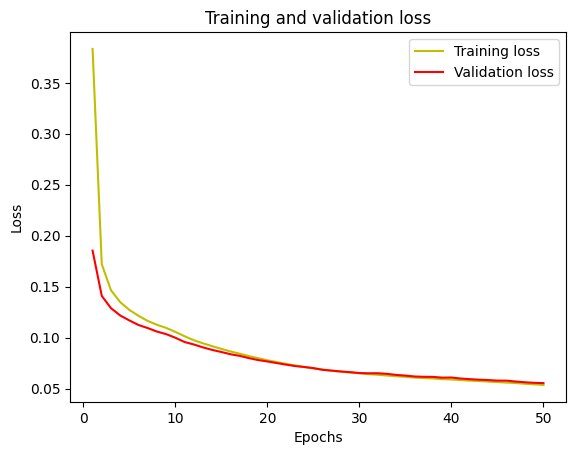

In [84]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

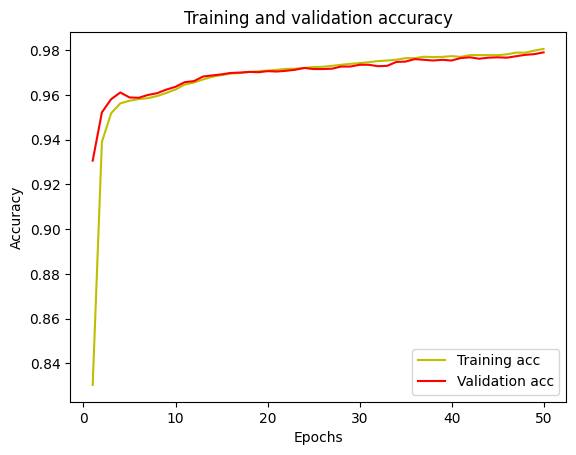

In [85]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [86]:
# Predicting the Test set results
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)

197/197 [==============================] - 0s 1ms/step


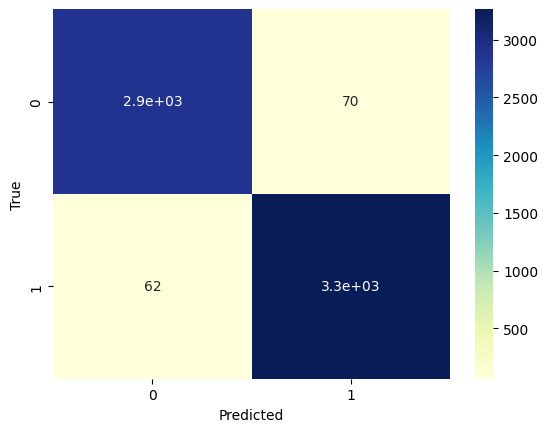

In [87]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap="YlGnBu")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [88]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98      2970
           1       0.98      0.98      0.98      3328

    accuracy                           0.98      6298
   macro avg       0.98      0.98      0.98      6298
weighted avg       0.98      0.98      0.98      6298

